# Numerical Integration

## Introduction

In this notebook we will explore the numerical integration of functions. We will use the trapezoidal rule and some other algorithms to approximate the integral of a function. We will also explore the convergence of these methods.

## Trapezoidal Rule

The trapezoidal rule is a method for approximating the integral of a function. The idea is to approximate the area under the curve of a function by approximating the area under the curve with trapezoids. The area of a trapezoid is given by the formula 

$$A = \frac{1}{2}h(b_1 + b_2)$$

where $h$ is the height of the trapezoid and $b_1$ and $b_2$ are the lengths of the two parallel sides. The trapezoidal rule approximates the area under the curve of a function by approximating the area under the curve with trapezoids. The trapezoidal rule is given by the formula

$$\int_a^b f(x) dx \approx \frac{1}{2}h\left(f(a) + f(b)\right)$$

where $h = b - a$.

# Example

As an example, we will consider a function which is the sum of three Gaussian distributions with different centroids, widths, and amplitudes. We will use then use various approximation methods to approximate the integral of this function. We will then compare the results of these methods to the exact value of the integral.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import special
import scipy.interpolate


# Define the centroids, widths, and amplitudes of the Gaussian distributions to be summed.
mu1 = 0.40
mu2 = 10.0
mu3 = 40.0

s1 = 3.0
s2 = 7.0
s3 = 15.0

a1 = 500.0
a2 = 1000.0
a3 = 3000.0

# Define the parameters of a Gaussian centered at 0, with a width of 1, and an amplitude of 1.
mut = 0.0
st = 1.0
at = 1.0


# Define a generic Gaussian function.
def gaussian(xv, mu, sigma, amplitude):
    """ Return the normalized Gaussian with standard deviation sigma. """
    c = amplitude/np.sqrt(2 * np.pi * sigma**2)
    return c*np.exp(-0.5 * ((xv - mu) / sigma)**2)

# Define the generating function for the three summed Gaussian distributions.
def generating_function(xv):
    global mu1, mu2, mu3, s1, s2, s3, a1, a2, a3
    return gaussian(xv, mu1, s1, a1) + gaussian(xv, mu2, s2, a2) + gaussian(xv, mu3, s3, a3)


# Define the generating function for the test Gaussian distribution (centered at 0, with a width of 1, and an amplitude of 1).
def generating_function_test(xv):
    global mut, st, at
    return gaussian(xv, mut, st, at)


# Define a function which calculates the integral of a function analytically.  This uses the erfc function from the scipy.special module.
def integral_analytic(xl, xh):
    global mu1, mu2, mu3, s1, s2, s3, a1, a2, a3

    integral = 0.0

    arg1 = (mu1 - xl) / (np.sqrt(2)*s1)
    arg2 = (mu1 - xh) / (np.sqrt(2)*s1)
    diff = special.erf(arg1)-special.erf(arg2)
    integral += 0.5*a1*diff

    arg1 = (mu2 - xl) / (np.sqrt(2)*s2)
    arg2 = (mu2 - xh) / (np.sqrt(2)*s2)
    diff = special.erf(arg1)-special.erf(arg2)
    integral += 0.5*a2*diff

    arg1 = (mu3 - xl) / (np.sqrt(2)*s3)
    arg2 = (mu3 - xh) / (np.sqrt(2)*s3)
    diff = special.erf(arg1)-special.erf(arg2)
    integral += 0.5*a3*diff

    return integral

# Define a function which calculates the integral of the test function (centered at 0, with a width of 1, and an amplitude of 1) analytically.  This uses the erfc function from the scipy.special module.
def integral_analytic_test(xl, xh):
    global mut, st, at
    print(xl, xh)
    arg1 = (mut - xl) / (np.sqrt(2)*st)
    arg2 = (mut - xh) / (np.sqrt(2)*st)
    print(arg1, arg2)
    print(special.erf(arg1), special.erf(arg2))
    diff = special.erf(arg1)-special.erf(arg2)
    return 0.5*at*diff

# Define a function which calculates the integral of a function numerically using the trapezoidal rule.
def integral_trapezoid(xa, ya):

    integral = 0.0
    for i in range(len(xa)-1):
        dx = (xa[i+1] - xa[i])
        integral += (ya[i]+ya[i+1])/2.0*dx

    return integral

In [4]:
# Define a set of x values to evaluate the generating function at.
#
# Note: The x values are not evenly spaced!  This is actually an extremely common situation in experimental data.

x = [0.1, 0.2, 0.45, 0.92, 2.7, 4.9, 5.6, 5.7, 9.2, 10.4, 20.2, 40.5, 41.5, 44.3, 60.2]

# Evaluate the generating function at the x values.
y = []
for xval in x:
    y.append(generating_function(xval))

# Define a set of x values, with 10000 elements, between the first and last x values (for plotting purposes, and for comparison
# to the analytic solution later on).
xfine = np.linspace(x[0], x[len(x)-1], 10000)

# Evaluate the generating function at the fine-grained x values.
yfine = []
for xval in xfine:
    yfine.append(generating_function(xval))

# Define a set of x values, with 1000 elements, between -6 and 6, and the associated y values for the test Gaussian function (centered at 0, with a width of 1, and an amplitude of 1).    
xt = np.linspace(-6.0, 6.0, 1000)
yt = []
for xval in xt:
    yt.append(generating_function_test(xval))

# Define xlow and high values for the integral.
xlow = x[0]
xhigh = x[len(x)-1]

# Calculate the analytic integral of the generating function.
actual = integral_analytic(xlow, xhigh)

# Calculate the integral using Trapezoid Rule with the fine-grained x values.
trap_brute = integral_trapezoid(xfine, yfine)

# Calculate the error in the trapezoid rule approximation using the fine-grained x values (from the exact value).
e_trap_brute = (trap_brute-actual)/actual*100.0

# Calculate the integral using Trapezoid Rule with the wider spaced x values, along with the error in the trapezoid rule approximation (from the exact value).
trap_data = integral_trapezoid(x, y)
e_trap_data = (trap_data - actual) / actual * 100.0

print(f"Analytic Integral from {xlow} to {xhigh}: {actual}")
print(f"Trapezoid from {xlow} to {xhigh} (10000 points): {trap_brute} - error = {e_trap_brute:.3f}%")
print(f"Trapezoid from {xlow} to {xhigh} (Data): {trap_data}- error = {e_trap_data:.3f}%")
print()



Analytic Integral from 0.1 to 60.2: 3912.4223874056247
Trapezoid from 0.1 to 60.2 (10000 points): 3912.4223580671337 - error = -0.000%
Trapezoid from 0.1 to 60.2 (Data): 3885.269136180611- error = -0.694%


# Investigation of Other Methods - Using Scipy.interpolate.interp1d

### We will now investigate the use of the scipy.interpolate.interp1d function to interpolate the generating function.  We will then use the interpolated function to calculate the integral using the trapezoid rule.  We will compare the results of this method to the exact value of the integral.

In [8]:
y0 = scipy.interpolate.interp1d(x, y, kind='nearest')
y1 = scipy.interpolate.interp1d(x, y, kind='linear')
y2 = scipy.interpolate.interp1d(x, y, kind='quadratic')
y3 = scipy.interpolate.interp1d(x, y, kind='cubic')

trap_y0 = integral_trapezoid(xfine, y0(xfine))
trap_y1 = integral_trapezoid(xfine, y1(xfine))
trap_y2 = integral_trapezoid(xfine, y2(xfine))
trap_y3 = integral_trapezoid(xfine, y3(xfine))
e_trap_y0 = (trap_y0 - actual) / actual * 100.0
e_trap_y1 = (trap_y1 - actual) / actual * 100.0
e_trap_y2 = (trap_y2 - actual) / actual * 100.0
e_trap_y3 = (trap_y3 - actual) / actual * 100.0

print(f"integral(Y0) from {xlow} to {xhigh}: {trap_y0}- error = {e_trap_y0:.3f}%")
print(f"integral(Y1) from {xlow} to {xhigh}: {trap_y1}- error = {e_trap_y1:.3f}%")
print(f"integral(Y2) from {xlow} to {xhigh}: {trap_y2}- error = {e_trap_y2:.3f}%")
print(f"integral(Y3) from {xlow} to {xhigh}: {trap_y3}- error = {e_trap_y3:.3f}%")

integral(Y0) from 0.1 to 60.2: 3885.305310850694- error = -0.693%
integral(Y1) from 0.1 to 60.2: 3885.2690820846815- error = -0.694%
integral(Y2) from 0.1 to 60.2: 3930.483520926911- error = 0.462%
integral(Y3) from 0.1 to 60.2: 3900.819892208276- error = -0.297%


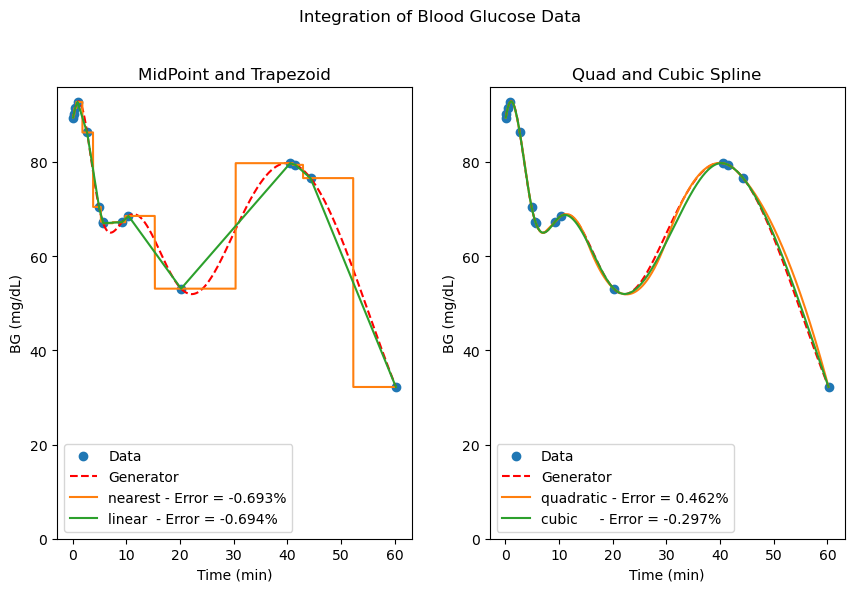

In [10]:
test = False

if not test:
    fig, ax = plt.subplots(1, 2, figsize=(9, 6))
    fig.suptitle('Integration of Blood Glucose Data')
    fig.tight_layout(pad=2.5)

    ax[0].plot(x, y, 'o', label='Data')
    ax[0].plot(xfine, yfine, 'r--', label='Generator')
    ax[1].plot(x, y, 'o', label='Data')
    ax[1].plot(xfine, yfine, 'r--', label='Generator')
    
    ax[0].plot(xfine, y0(xfine), label=f'nearest - Error = {e_trap_y0:.3f}%')
    ax[0].plot(xfine, y1(xfine), label=f'linear  - Error = {e_trap_y1:.3f}%')
    ax[1].plot(xfine, y2(xfine), label=f'quadratic - Error = {e_trap_y2:.3f}%')
    ax[1].plot(xfine, y3(xfine), label=f'cubic     - Error = {e_trap_y3:.3f}%')
    
    ax[0].set_ylim(0)
    ax[0].set_title("MidPoint and Trapezoid")
    ax[0].set_xlabel("Time (min)")
    ax[0].set_ylabel("BG (mg/dL)")
    ax[0].legend()
    
    ax[1].set_ylim(0)
    ax[1].set_title("Quad and Cubic Spline")
    ax[1].set_xlabel("Time (min)")
    ax[1].set_ylabel("BG (mg/dL)")
    ax[1].legend()
    
    plt.show()
else:
    plt.plot(xt, yt, 'r--')
    plt.show()